# 20260128: 實作NCSN+Annealing Langevin Sampling - 2D

1. 建構 NCSN (Model)：寫一個神經網路，輸入是 $(x, \sigma)$，輸出是 $\epsilon$ (或 Score)。 定義 Loss Function 來訓練它。
2. 實作 Algorithm 1 (Sampling)：寫一個函式，裡面有兩層迴圈。外層控制 $\sigma$ (Annealing)。內層跑 $T$ 次演算法中第 6 行的公式 (Langevin Step)。



## Model
根據 NCSN 的目標函數定義，原始的 Denoising Score Matching 損失函數為：$$\ell(\theta; \sigma) \triangleq \frac{1}{2} \mathbb{E}_{p_{\text{data}}(x)} \mathbb{E}_{\tilde{x} \sim \mathcal{N}(x, \sigma^2 I)} \left[ \left\| s_\theta(\tilde{x}, \sigma) + \frac{\tilde{x} - x}{\sigma^2} \right\|_2^2 \right]$$

其中總損失函數定義為 $$\mathcal{L} = \frac{1}{L} \sum_{i=1}^L \lambda(\sigma_i) \ell(\theta; \sigma_i).$$

為了數值穩定性，NCSN 選擇權重函數 $\lambda(\sigma_i) = \sigma_i^2$。

實作方面，我們定義一個噪聲預測網路 $\boldsymbol{\epsilon}_\theta(\tilde{x}, \sigma)$，並令：$$s_\theta(\tilde{x}, \sigma) \triangleq -\frac{\boldsymbol{\epsilon}_\theta(\tilde{x}, \sigma)}{\sigma}$$

## Langevin
在演算法中(第6行):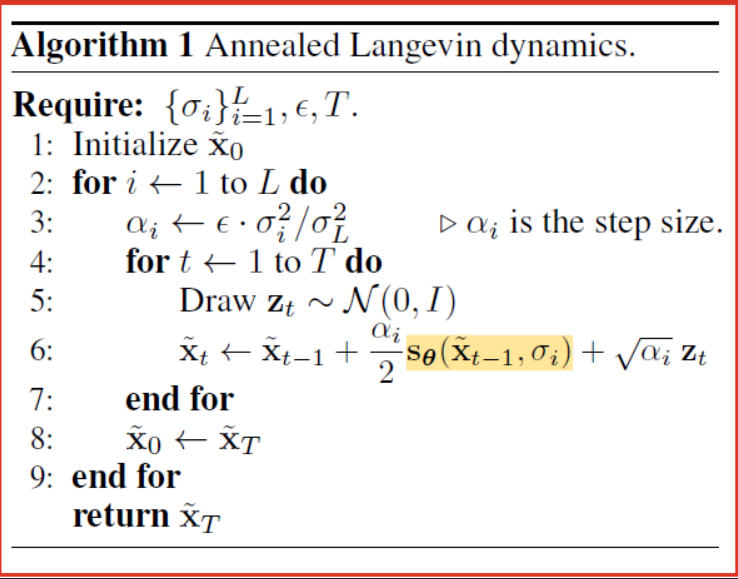
* 原版 (預測 Score):$$\tilde{x}_t \leftarrow \tilde{x}_{t-1} + \frac{\alpha_i}{2} \mathbf{s_\theta}(\tilde{x}_{t-1}, \sigma_i) + \sqrt{\alpha_i} z_t$$
* 新版 (預測 $\epsilon$):因為 $\text{Score} \approx -\frac{\epsilon}{\sigma}$，所以把 $s_\theta$ 換掉：$$\tilde{x}_t \leftarrow \tilde{x}_{t-1} + \frac{\alpha_i}{2} \left( -\frac{\boldsymbol{\epsilon}_\theta(\tilde{x}_{t-1}, \sigma_i)}{\sigma_i} \right) + \sqrt{\alpha_i} z_t$$